# matplotlib

[matplotlib](http://matplotlib.org) is the most used to plot. It is the *reference*.

Every plotting library works the same way: 

* We define axis (they boundaries can be adjusted based on the data)
* We add curves, points, surfaces (A).
* We add legendes (B).
* We convert the plot into an image.

Step (A) and (B) can be repeated in any order. Curves and legends superimposed.


[documentation](http://matplotlib.org/) [source](https://github.com/matplotlib/matplotlib) [installation](http://matplotlib.org/users/installing.html) [tutorial](http://matplotlib.org/users/pyplot_tutorial.html) [gallery](http://matplotlib.org/gallery.html)

In [1]:
%matplotlib inline

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Setup

Some parts of *matplotlib* are written in C and needs to be compiled. Thus the instruction ``pip install matplotlib`` usually fails on Windows unless [Visual Studio 2015 Community Edition](https://www.visualstudio.com/en-us/products/visual-studio-community-vs.aspx) is installed. I recommend to use a precompiled version through ``conda install matplotlib`` or  [Unofficial Windows Binaries for Python Extension Packages](http://www.lfd.uci.edu/~gohlke/pythonlibs/) sous Windows.

In [4]:
import matplotlib.pyplot as plt

## First example

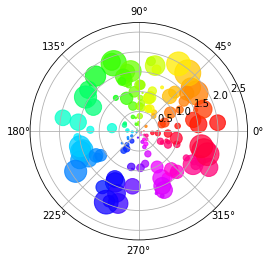

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2 * np.random.rand(N)
colors = theta

ax = plt.subplot(111, projection='polar')
c = plt.scatter(theta, r, c=colors, s=area, cmap=plt.cm.hsv)
c.set_alpha(0.75)

## Animation

To make it work:

* Install [ffmpeg](https://ffmpeg.org/) on Windows or [avconv](https://libav.org/avconv.html) on Linux
* On Windows, open file ``matplotlibrc`` and update parameter ``animation.ffmpeg_path``. On Linux, the same must be done for *avconv*.

In [6]:
import matplotlib
matplotlib.matplotlib_fname()

'c:\\Python36_x64\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [8]:
import os
matplotlib.rcParams['animation.ffmpeg_path'].replace(os.environ.get("USERPROFILE", "~"), "<user>")

'<user>\\ffmpeg-20170821-d826951-win64-static\\bin\\ffmpeg.exe'

In [10]:
import matplotlib.animation
matplotlib.animation.writers.list()

['ffmpeg', 'ffmpeg_file']

Let's take an example from matplotlib documentation [bayes_update](http://matplotlib.org/1.4.1/examples/animation/bayes_update.html).

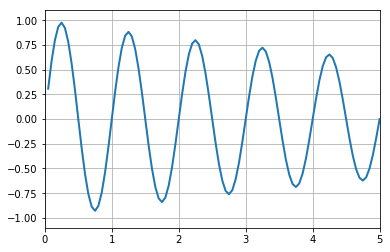

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt+=1
        t += 0.05
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)
data_gen.t = 0

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(0, 5)
ax.grid()
xdata, ydata = [], []
def run(data):
    # update the data
    t,y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

anim = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10, repeat=False)

# saves the video
from matplotlib.animation import writers
Writer = writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
anim.save('lines2.mp4', writer=writer)

In [13]:
import os
[_ for _ in os.listdir(".") if "mp4" in _]

['lines2.mp4']

**Open question :** how to display the video in the notebook?

## Interactions

Interaction can be done with the regular GUI. See [poly_editor.py](http://matplotlib.org/examples/event_handling/poly_editor.html).

Use javascript!